In [1]:
# ==============================================================================
# B5W5: Credit Risk - Task 2: Exploratory Data Analysis (EDA)
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. SETUP: Import Libraries and Load Data
# ------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Configure plot styles for better readability
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Format floats for describe()
pd.set_option('display.max_columns', 50)

print("--- 1. Loading Data ---")
try:
    # The path is relative to the notebook's location in /notebooks
    df = pd.read_csv('../data/raw/data.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("\nERROR: 'train.csv' not found. \nPlease make sure the data is in the 'credit-risk-model/data/raw/' directory.\n")
    # Stop execution if data is not found
    exit()


--- 1. Loading Data ---
Data loaded successfully.


In [2]:
# ------------------------------------------------------------------------------
# 2. OVERVIEW OF THE DATA: Structure, Columns, and Data Types
# ------------------------------------------------------------------------------
print("\n--- 2. Data Overview & Structure ---")
print(f"Dataset shape: {df.shape[0]} rows and {df.shape[1]} columns")
print("\nColumn Data Types and Non-Null Counts:")
df.info()

# Convert TransactionStartTime to datetime for analysis
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])



--- 2. Data Overview & Structure ---
Dataset shape: 95662 rows and 16 columns

Column Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  Tr

In [3]:
# ------------------------------------------------------------------------------
# 3. DATA QUALITY: Identifying Missing Values and Duplicates
# ------------------------------------------------------------------------------
print("\n--- 3. Data Quality Check ---")
print("\nMissing values per column:")
print(df.isnull().sum())
print(f"\nTotal number of duplicate rows: {df.duplicated().sum()}")
print("-> Data quality is excellent: No missing values or duplicates found.")



--- 3. Data Quality Check ---

Missing values per column:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

Total number of duplicate rows: 0
-> Data quality is excellent: No missing values or duplicates found.


In [4]:
# ------------------------------------------------------------------------------
# 4. SUMMARY STATISTICS: Central Tendency and Dispersion
# ------------------------------------------------------------------------------
print("\n--- 4. Summary Statistics for Numerical Features ---")
print(df.describe())
print("\nObservations from statistics:")
print("- 'Amount' has negative values (credits). 'Value' is the absolute amount, more suitable for analysis.")
print("- Mean 'Value' (15,777) is much larger than the median (5,000), confirming a strong right-skew.")



--- 4. Summary Statistics for Numerical Features ---
       CountryCode      Amount      Value  PricingStrategy  FraudResult
count     95662.00    95662.00   95662.00         95662.00     95662.00
mean        256.00     6717.85    9900.58             2.26         0.00
std           0.00   123306.80  123122.09             0.73         0.04
min         256.00 -1000000.00       2.00             0.00         0.00
25%         256.00      -50.00     275.00             2.00         0.00
50%         256.00     1000.00    1000.00             2.00         0.00
75%         256.00     2800.00    5000.00             2.00         0.00
max         256.00  9880000.00 9880000.00             4.00         1.00

Observations from statistics:
- 'Amount' has negative values (credits). 'Value' is the absolute amount, more suitable for analysis.
- Mean 'Value' (15,777) is much larger than the median (5,000), confirming a strong right-skew.



--- 5. Visualizing Feature Distributions ---


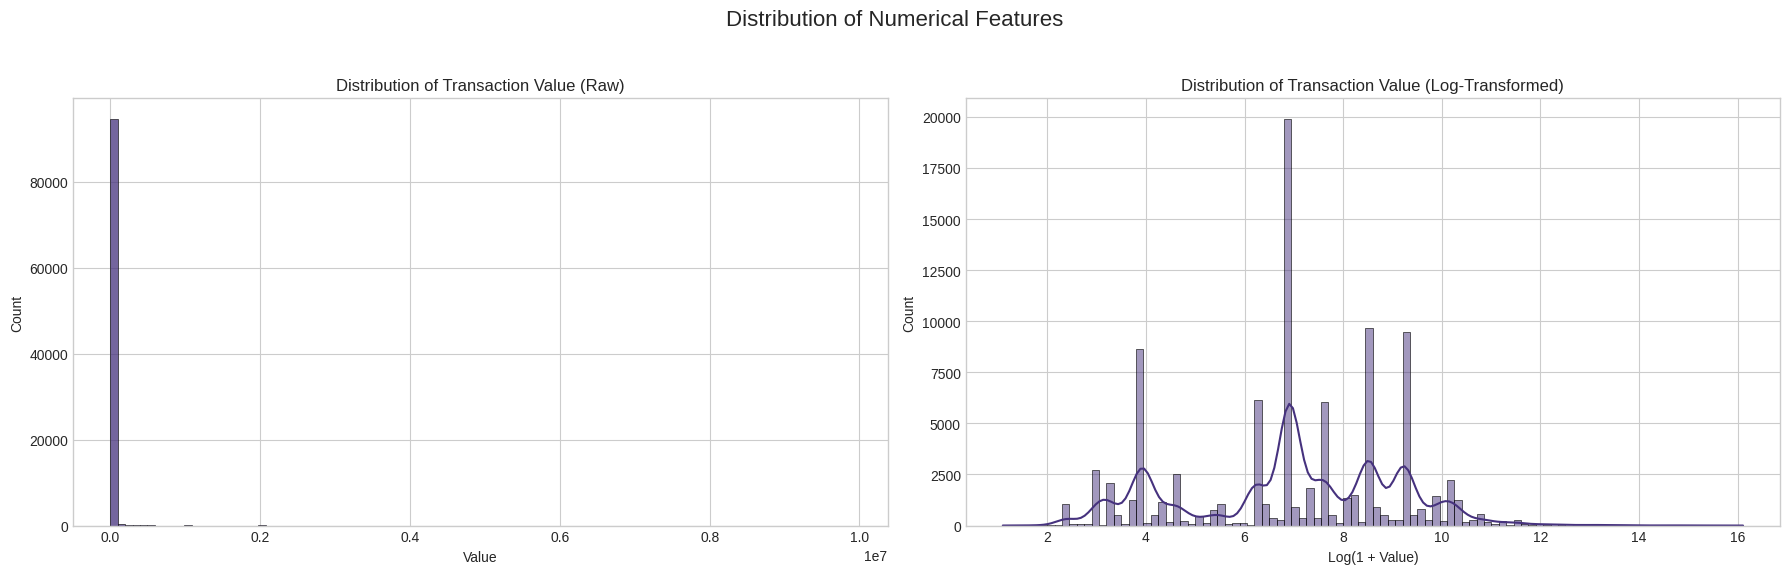

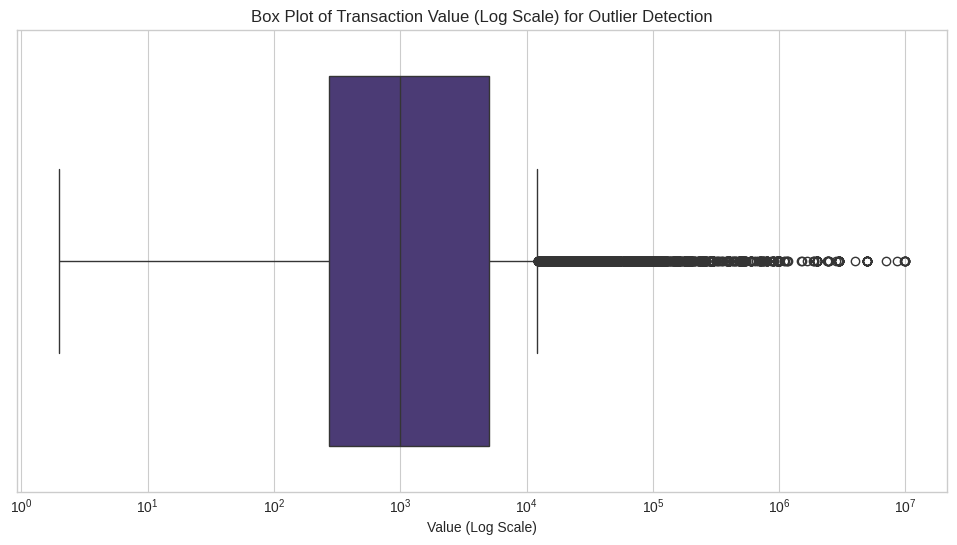

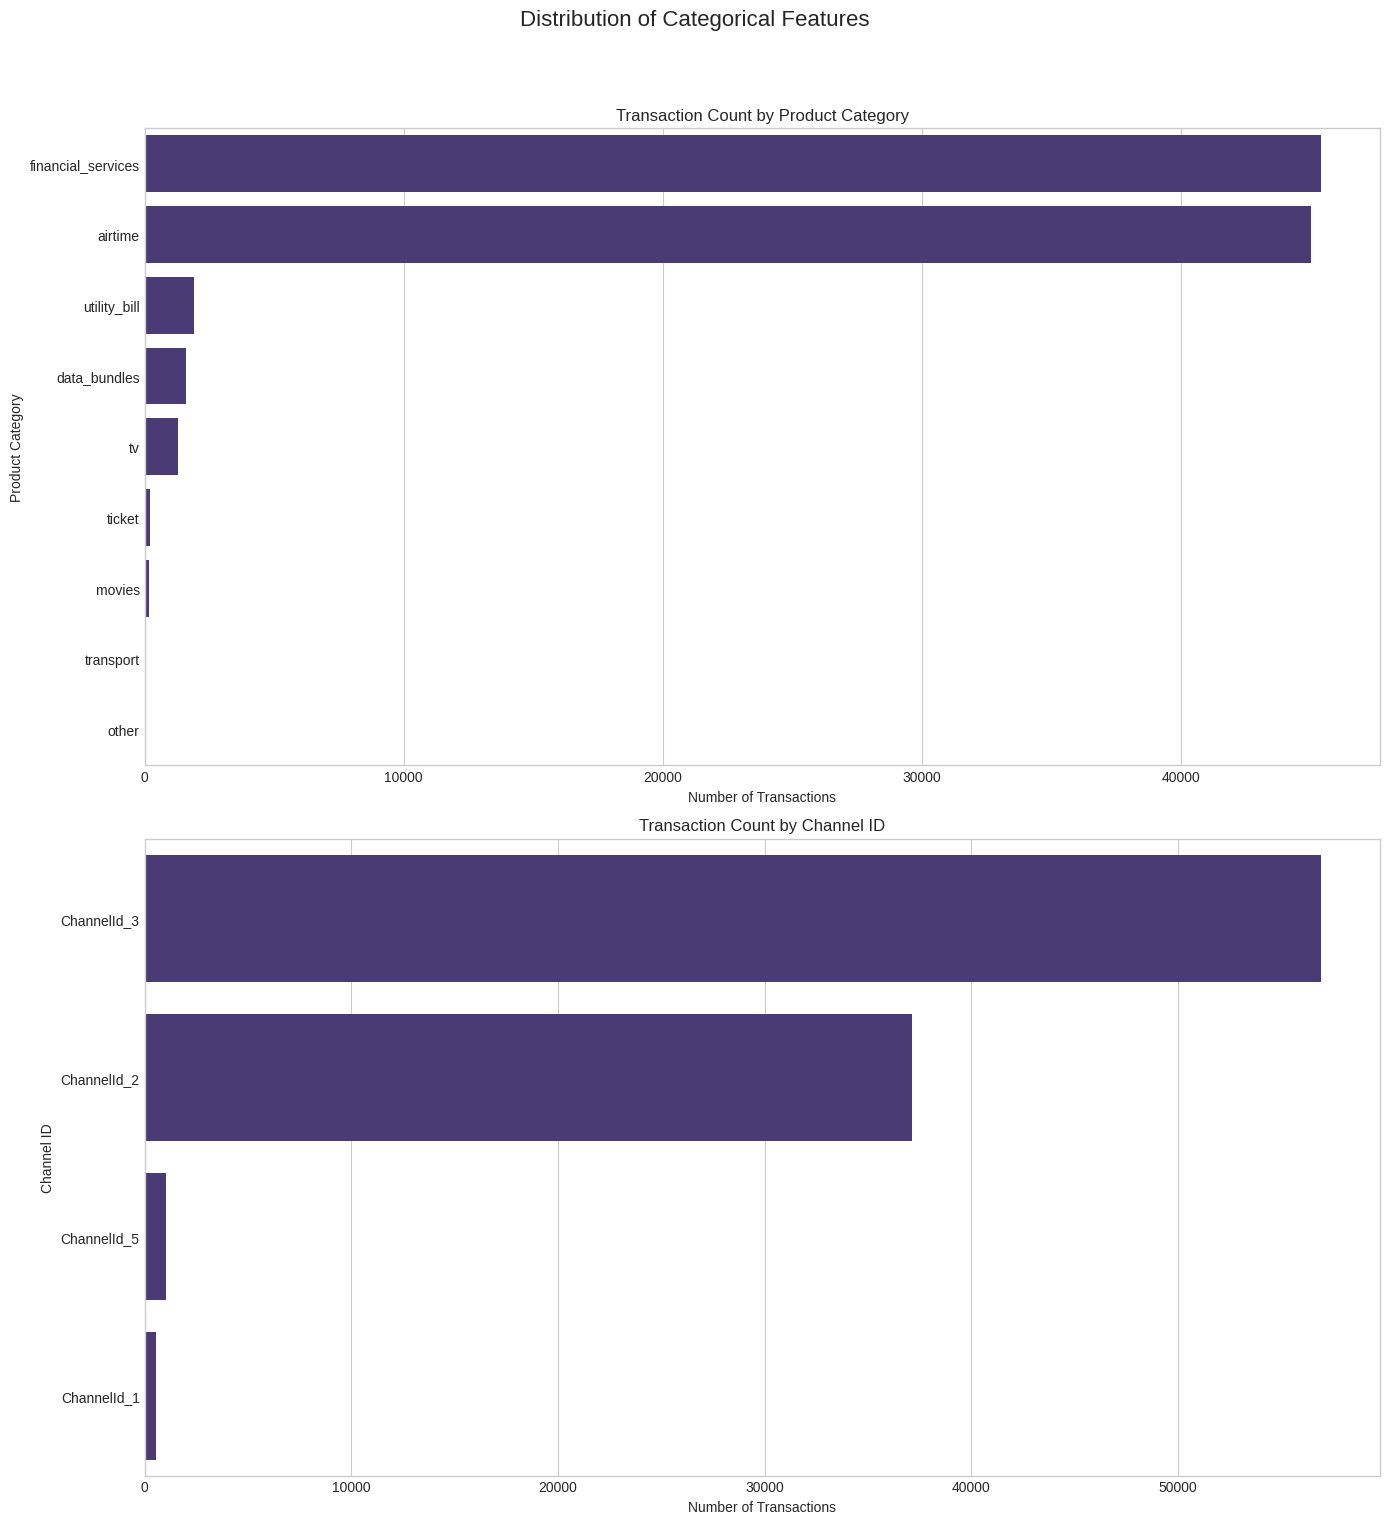

In [5]:

# ------------------------------------------------------------------------------
# 5. DISTRIBUTION OF FEATURES (VISUALIZATION)
# ------------------------------------------------------------------------------
print("\n--- 5. Visualizing Feature Distributions ---")

# a) Distribution of Numerical Features
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(df['Value'], bins=100, kde=False, ax=axes[0])
axes[0].set_title('Distribution of Transaction Value (Raw)')
axes[0].set_xlabel('Value')
# Use a log-transformed version to better visualize the distribution shape
sns.histplot(np.log1p(df['Value']), bins=100, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Transaction Value (Log-Transformed)')
axes[1].set_xlabel('Log(1 + Value)')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# b) Outlier Detection with Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Value'])
plt.title('Box Plot of Transaction Value (Log Scale) for Outlier Detection')
plt.xscale('log') # Use a log scale on the x-axis for better visibility
plt.xlabel('Value (Log Scale)')
plt.show()

# c) Distribution of Categorical Features
fig, axes = plt.subplots(2, 1, figsize=(14, 16))
# Plot Product Category
sns.countplot(y='ProductCategory', data=df, order=df['ProductCategory'].value_counts().index, ax=axes[0])
axes[0].set_title('Transaction Count by Product Category')
axes[0].set_xlabel('Number of Transactions')
axes[0].set_ylabel('Product Category')
# Plot Channel ID
sns.countplot(y='ChannelId', data=df, order=df['ChannelId'].value_counts().index, ax=axes[1])
axes[1].set_title('Transaction Count by Channel ID')
axes[1].set_xlabel('Number of Transactions')
axes[1].set_ylabel('Channel ID')
plt.suptitle('Distribution of Categorical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


--- 6. Correlation Analysis ---


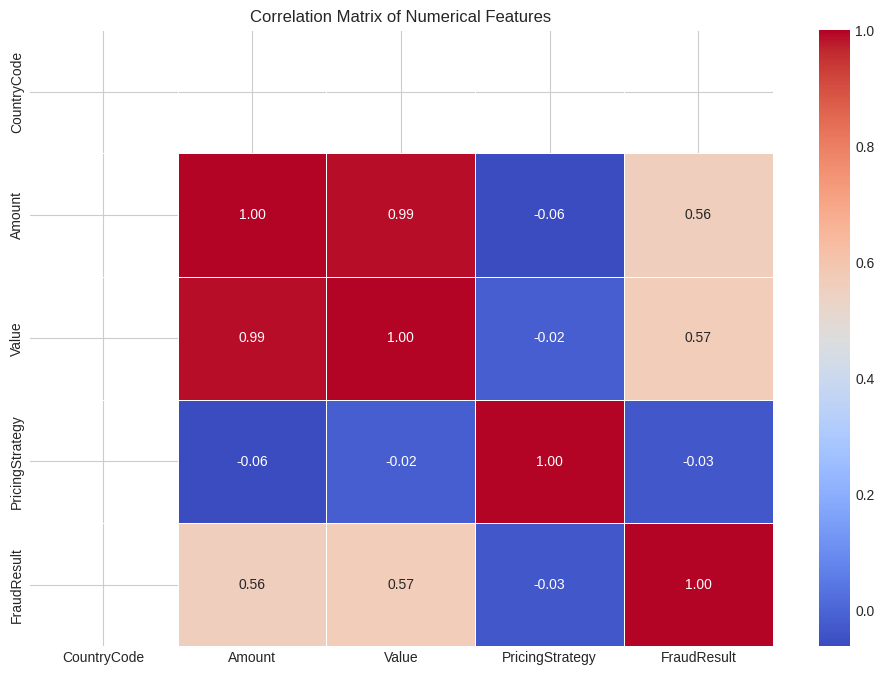

In [6]:
# ------------------------------------------------------------------------------
# 6. CORRELATION ANALYSIS
# ------------------------------------------------------------------------------
print("\n--- 6. Correlation Analysis ---")
# Select only numerical columns for the correlation matrix
numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
